In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml


In [2]:
dataset = fetch_openml(data_id=45554, as_frame=True)
df = dataset.frame

df.head()


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55.0,144.0,4,84,20,3,0,83,2.0,...,43,0.0,0,0,33.0,NaN,8.0,1.0,1.0,69.0
1,Bad,61.0,58.0,15,41,2,4,4,100,NaN,...,67,0.0,0,0,0.0,NaN,0.0,NaN,NaN,0.0
2,Bad,67.0,66.0,5,24,9,0,0,100,NaN,...,44,0.0,4,4,53.0,66.0,4.0,2.0,1.0,86.0
3,Bad,66.0,169.0,1,73,28,1,1,93,76.0,...,57,0.0,5,4,72.0,83.0,6.0,4.0,3.0,91.0
4,Bad,81.0,333.0,27,132,12,0,0,100,NaN,...,25,0.0,1,1,51.0,89.0,3.0,1.0,0.0,80.0


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 9871
Columns: 24


In [4]:
df["RiskPerformance"].value_counts()


RiskPerformance
Bad     5136
Good    4735
Name: count, dtype: int64

In [5]:
df["RiskPerformance"].value_counts(normalize=True) * 100


RiskPerformance
Bad     52.031203
Good    47.968797
Name: proportion, dtype: float64

In [6]:
df.columns


Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [7]:
df.isna().sum().sort_values(ascending=False)


MSinceMostRecentDelq                  4840
NetFractionInstallBurden              3419
MSinceMostRecentInqexcl7days          2331
NumInstallTradesWBalance               861
NumBank2NatlTradesWHighUtilization     583
MSinceOldestTradeOpen                  239
NetFractionRevolvingBurden             186
NumRevolvingTradesWBalance             156
PercentTradesWBalance                   18
ExternalRiskEstimate                    10
NumTrades90Ever2DerogPubRec              0
NumTrades60Ever2DerogPubRec              0
MSinceMostRecentTradeOpen                0
RiskPerformance                          0
NumSatisfactoryTrades                    0
AverageMInFile                           0
PercentInstallTrades                     0
NumTradesOpeninLast12M                   0
NumTotalTrades                           0
MaxDelqEver                              0
PercentTradesNeverDelq                   0
MaxDelq2PublicRecLast12M                 0
NumInqLast6M                             0
NumInqLast6

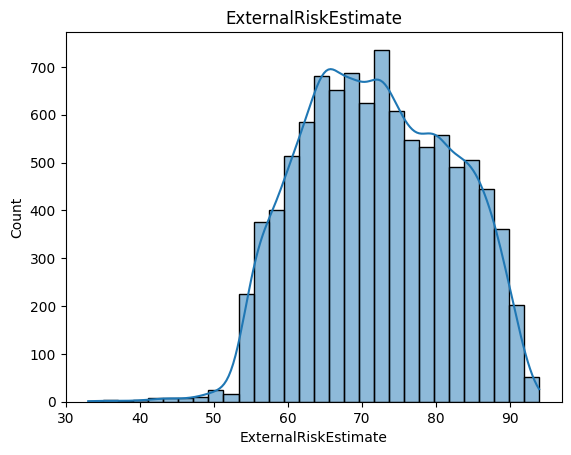

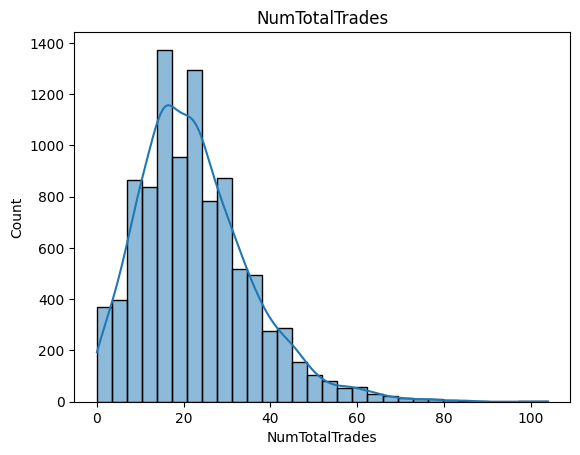

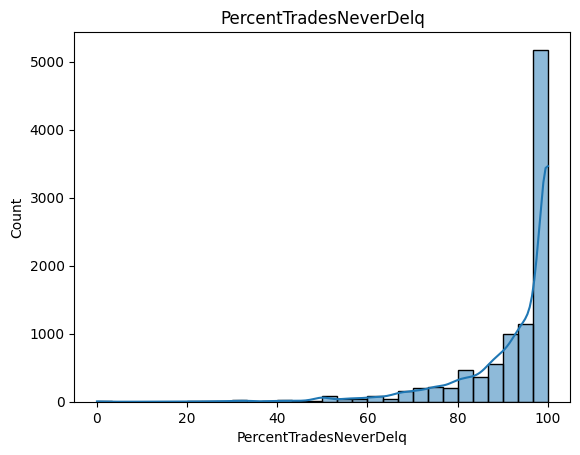

In [8]:
features_to_plot = ["ExternalRiskEstimate", "NumTotalTrades", "PercentTradesNeverDelq"]

for f in features_to_plot:
    sns.histplot(df[f], bins=30, kde=True)
    plt.title(f)
    plt.show()


In [ ]:
df["target"] = (df["RiskPerformance"] == "Bad").astype(int)

print(df["target"].dtype)
df[["RiskPerformance", "target"]].head()


int64


,RiskPerformance,target
0,Bad,1
1,Bad,1
2,Bad,1
3,Bad,1
4,Bad,1


In [14]:
numeric_df = df.select_dtypes(include=["number"])

print("Is target in numeric df?", "target" in numeric_df.columns)

corr = numeric_df.corr()["target"].sort_values(ascending=False)
corr.head(10)


Is target in numeric df? True


target                                1.000000
NetFractionRevolvingBurden            0.355754
PercentTradesWBalance                 0.279369
NumBank2NatlTradesWHighUtilization    0.245632
NumTrades60Ever2DerogPubRec           0.169747
NumInqLast6M                          0.143640
NumTrades90Ever2DerogPubRec           0.140443
PercentInstallTrades                  0.140418
NumInqLast6Mexcl7days                 0.137998
NumRevolvingTradesWBalance            0.131538
Name: target, dtype: float64

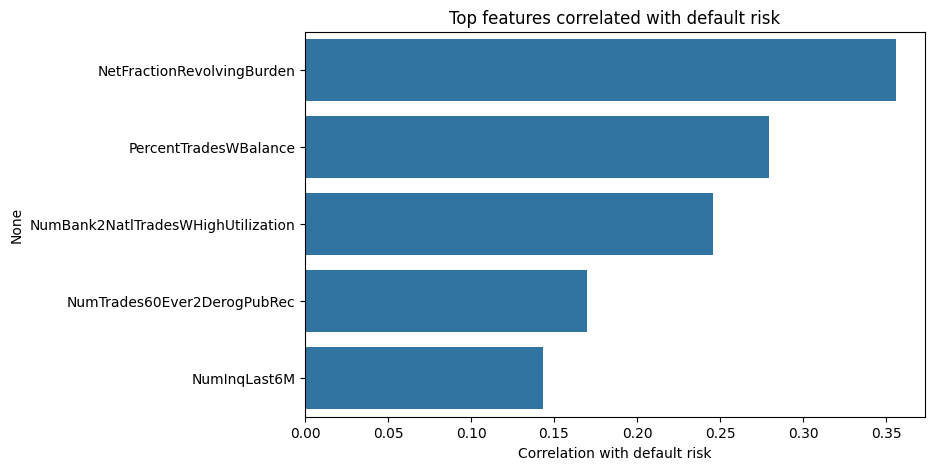

In [15]:
top5 = corr.drop("target").head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top5.values, y=top5.index)
plt.title("Top features correlated with default risk")
plt.xlabel("Correlation with default risk")
plt.show()
